In [38]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Introduction

This project uses a dataset of over 80,000 UFO sightings over the past century.  We will examine, clean and analyze the data nd attempt to find conclusions or patterns.

In [69]:
ufos = pd.read_csv('scrubbed.csv')

C:\Users\ryan7\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (5,9) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Data Exploration

Now, we explore our dataset, taking note of any areas which may need cleaning.

In [40]:
ufos.info()
ufos.sample(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80332 entries, 0 to 80331
Data columns (total 11 columns):
datetime                80332 non-null object
city                    80332 non-null object
state                   74535 non-null object
country                 70662 non-null object
shape                   78400 non-null object
duration (seconds)      80332 non-null object
duration (hours/min)    80332 non-null object
comments                80317 non-null object
date posted             80332 non-null object
latitude                80332 non-null object
longitude               80332 non-null float64
dtypes: float64(1), object(10)
memory usage: 6.7+ MB


,datetime,city,state,country,shape,duration (seconds),duration (hours/min),comments,date posted,latitude,longitude
26224,7/16/2003 2:00,london (uk/england),NaN,gb,unknown,60,1 minute,London 3 witnesses - nothing special just a ni...,7/23/2003,51.514125,-0.093689
59698,4/29/2011 3:00,hialeah,fl,us,fireball,2,1-2 seconds,A green fireball fell from the sky in the dist...,5/2/2011,25.8572222,-80.278333
26956,9/3/2003 20:36,montello,nh,NaN,light,10,10 seconds,Bright object lasting 10 seconds in the same a...,9/24/2003,43.193852,-71.572395
23121,8/2/2002 21:34,new zealand,NaN,NaN,other,1560,26 minutes,7 crafts&#44 big lights&#44 loud screaching no...,8/16/2002,-40.900557,174.885971
56689,8/3/2010 18:00,osage beach,mo,us,fireball,2700,45 minutes,Very UNUSUAL lens reflection&#44 atmospheric c...,8/24/2010,38.1502778,-92.617778


We have some missing values to deal with in the 'state', 'country' and 'shape' columns.  For simplicity, we will fill these with the string 'missing' so we can address them later.

In [41]:
ufos["state"] = ufos["state"].fillna("missing")
ufos["country"] = ufos["country"].fillna("missing")
ufos["shape"] = ufos["shape"].fillna("missing")

upper_states = []
for state in ufos["state"]:
    upper_states.append(state.upper())
ufos["state"] = upper_states

ufos["state"].unique()

array(['MISSING', 'MO', 'TX', 'IN', 'IL', 'OR', 'NY', 'CO', 'KS', 'ND',
       'PE', 'AK', 'CA', 'AL', 'SC', 'IA', 'MI', 'GA', 'TN', 'NE', 'LA',
       'KY', 'NM', 'BC', 'UT', 'RI', 'FL', 'NC', 'VA', 'WA', 'ME', 'AZ',
       'OH', 'PA', 'MN', 'WI', 'MD', 'NV', 'ID', 'OK', 'NB', 'WV', 'MS',
       'AR', 'NJ', 'CT', 'ON', 'MB', 'WY', 'AB', 'MA', 'MT', 'DC', 'PR',
       'DE', 'QC', 'NH', 'SD', 'NF', 'VT', 'HI', 'SA', 'NS', 'SK', 'PQ',
       'NT', 'YK', 'YT'], dtype=object)

# Analysis

### Exploring by State

For our first analysis, we want to see results by state, so we are only concerned with the rows which specify 'us' as the country.

Text(0, 0.5, 'State abbr.')

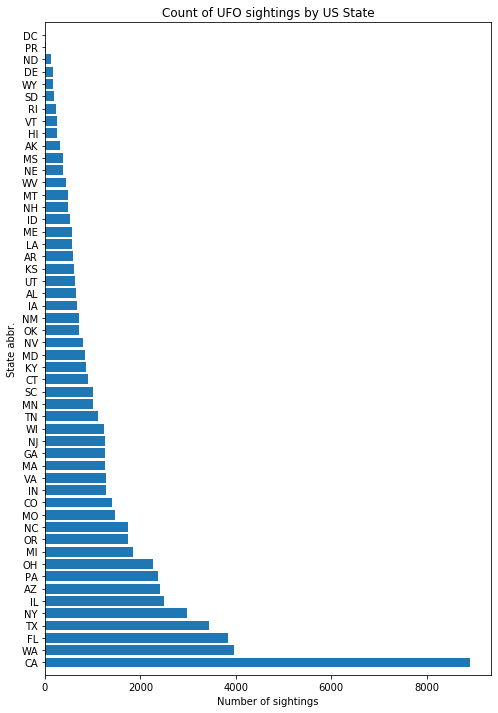

In [42]:
state_counts = ufos[ufos["country"] == "us"].state.value_counts().values
state_names = ufos[ufos["country"] == "us"].state.value_counts().index

fig, ax = plt.subplots(figsize = (8,12))
ax.barh(state_names, state_counts)
ax.set_ylim((-1,52))
ax.set_title("Count of UFO sightings by US State")
ax.set_xlabel("Number of sightings")
ax.set_ylabel("State abbr.")

### Exploring by Year

Let's see if UFO sightings have increased or decreased per year in the dataset.  For this section, we must bear in mind that the data may be biased, as it is likely harder to get records for older sightings.

First we prepare by generating a new column which specifies the year of the sighting.  While we do this, we will also make columns for month and season, for later analysis.

In [43]:
# seasons key: 0=winter, 1=spring, 2=summer, 3=fall
months = []
seasons = []
years = []

for row in ufos["datetime"]:
    split_row = row.split('/')
    month = int(split_row[0])
    year = split_row[2].split(' ')[0]
    
    value = ""
    if month < 3:
        value = '0'
    elif month < 6:
        value = '1'
    elif month < 9:
        value = '2'
    elif month < 12:
        value = '3'
    elif month < 13:
        value = '0'
    else:
        value = "missing"

    months.append(month)
    seasons.append(value)
    years.append(year)

ufos["month"] = months
ufos["season"] = seasons
ufos["year"] = years

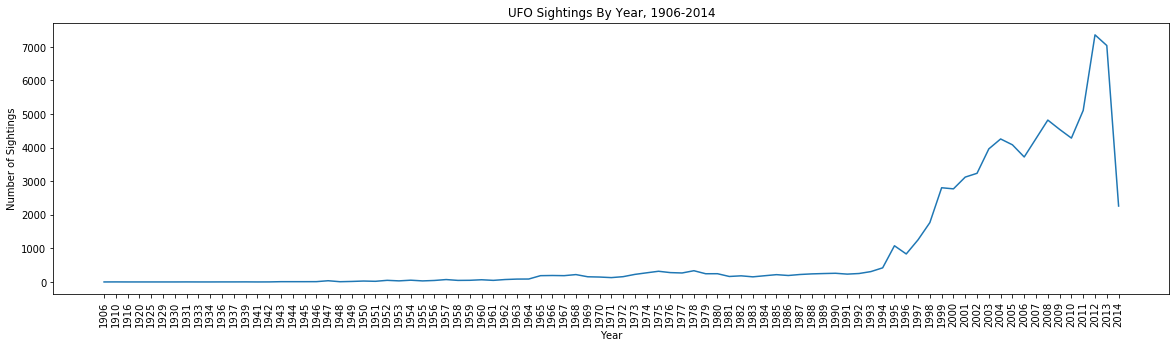

In [44]:
year_index = ufos["year"].value_counts().sort_index().index
year_counts = ufos["year"].value_counts().sort_index().values

fig, ax = plt.subplots(figsize = (20,5))
ax.plot(year_index, year_counts)
ax.set_title("UFO Sightings By Year, 1906-2014")
ax.set_ylabel("Number of Sightings")
ax.set_xlabel("Year")
ax.tick_params(axis='x',rotation=90)

We must also address with the above graph the fact that there are some missing years in the data.  For example, the year 1907 does not exist in the dataset.  This is much more frequent for older values, because there are many years in which 0 sightings were recorded pre-1940.

### Exploring by Time of Year

Now we return to the month and season columns, and number of sightings against these.

[Text(0, 0, 'winter'),
 Text(0, 0, 'spring'),
 Text(0, 0, 'summer'),
 Text(0, 0, 'fall')]

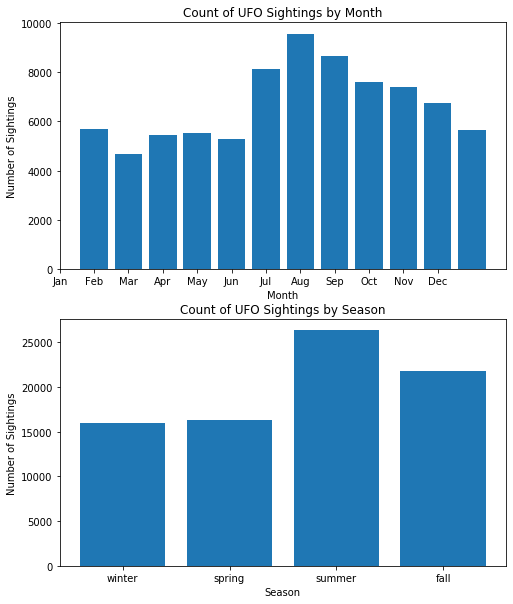

In [45]:
month_index = ufos["month"].value_counts().index
month_counts = ufos["month"].value_counts().values
month_names = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
month_tick_positions = np.arange(12)

season_index = ufos["season"].value_counts().sort_index().index
season_counts = ufos["season"].value_counts().sort_index().values
season_names = ['winter','spring','summer','fall']

fig = plt.figure(figsize=(8,10))

ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

ax1.bar(month_index, month_counts)
ax1.set_title("Count of UFO Sightings by Month")
ax1.set_xlabel("Month")
ax1.set_ylabel("Number of Sightings")
ax1.set_xticks(month_tick_positions)
ax1.set_xticklabels(month_names)

ax2.bar(season_index, season_counts)
ax2.set_title("Count of UFO Sightings by Season")
ax2.set_xlabel("Season")
ax2.set_ylabel("Number of Sightings")
ax2.set_xticklabels(season_names)

### Exploring by Duration

Next let's look at results by duration, to see how long the average sighting lasts.  First we correct for a few erroneous values containing bad characters, then cast to float.

In [70]:
ufos["duration (seconds)"] = ufos["duration (seconds)"].str.replace('`','')
ufos["duration (seconds)"] = ufos["duration (seconds)"].astype(float)

In [73]:
ufos["duration (seconds)"].describe()

count    6.553600e+04
mean     9.589322e+03
std      6.523036e+05
min      1.000000e-03
25%      3.000000e+01
50%      1.800000e+02
75%      6.000000e+02
max      9.783600e+07
Name: duration (seconds), dtype: float64

[Text(0, 0, '0-5'),
 Text(0, 0, '5-10'),
 Text(0, 0, '10-15'),
 Text(0, 0, '15-20'),
 Text(0, 0, '20-25'),
 Text(0, 0, '25-30'),
 Text(0, 0, '30-35'),
 Text(0, 0, '35-40'),
 Text(0, 0, '40-45'),
 Text(0, 0, '45-50'),
 Text(0, 0, '50-55'),
 Text(0, 0, '55-60')]

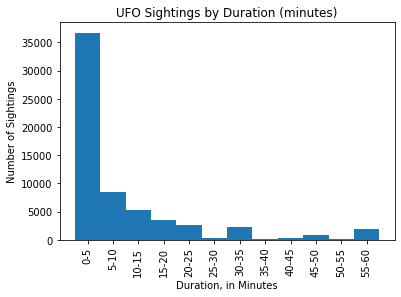

In [122]:
fig, ax = plt.subplots()

duration_tick_positions = 300 * np.arange(12) + 150
duration_tick_labels = []
for x in range(12):
    first = x * 5
    last = (x+1) * 5
    label = str(first) + "-" + str(last)
    duration_tick_labels.append(label)

ax.hist(ufos["duration (seconds)"], range=(0,3600), bins=12)
ax.set_title("UFO Sightings by Duration (minutes)")
ax.set_xlabel("Duration, in Minutes")
ax.set_ylabel("Number of Sightings")
ax.set_xticks(duration_tick_positions)
ax.set_xticklabels(duration_tick_labels, rotation=90)

We can see that the majority of sightings are in the 0-5 minute range.  Let's get a more specific breakdown of these by looking only at the sightings under 5 minutes.

[Text(0, 0, '0-25'),
 Text(0, 0, '25-50'),
 Text(0, 0, '50-75'),
 Text(0, 0, '75-100'),
 Text(0, 0, '100-125'),
 Text(0, 0, '125-150'),
 Text(0, 0, '150-175'),
 Text(0, 0, '175-200'),
 Text(0, 0, '200-225'),
 Text(0, 0, '225-250'),
 Text(0, 0, '250-275'),
 Text(0, 0, '275-300')]

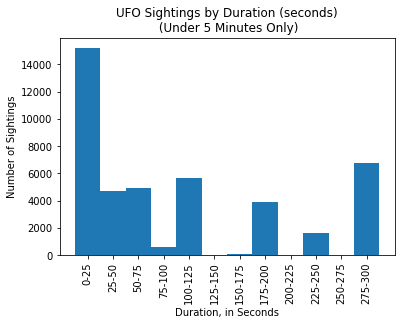

In [121]:
fig, ax = plt.subplots()

duration_tick_positions = 25*np.arange(12) + 12.5
duration_tick_labels = []
for x in range(12):
    first = x * 25
    last = (x+1) * 25
    label = str(first) + "-" + str(last)
    duration_tick_labels.append(label)

ax.hist(ufos["duration (seconds)"], range=(0,300), bins=12)
ax.set_title("UFO Sightings by Duration (seconds)\n (Under 5 Minutes Only)")
ax.set_xlabel("Duration, in Seconds")
ax.set_ylabel("Number of Sightings")
ax.set_xticks(duration_tick_positions)
ax.set_xticklabels(duration_tick_labels, rotation=90)

### Exploring by Shape Description

For this section, we will explore the shape descriptors given to each sighting.  First we notice that there are several shapes which only have a few observations.  We will consider these outliers and re-assign them to the most appropriate other shape.

In [124]:
ufos["shape"].value_counts()

light        16565
triangle      7865
circle        7608
fireball      6208
other         5649
unknown       5584
sphere        5387
disk          5213
oval          3733
formation     2457
cigar         2057
changing      1962
flash         1328
rectangle     1297
cylinder      1283
diamond       1178
chevron        952
egg            759
teardrop       750
cone           316
cross          233
delta            7
crescent         2
round            2
changed          1
pyramid          1
dome             1
hexagon          1
flare            1
Name: shape, dtype: int64

In [131]:
ufos.loc[ufos["shape"] == 'delta','shape'] = 'triangle'
ufos.loc[ufos["shape"] == 'crescent','shape'] = 'other'
ufos.loc[ufos["shape"] == 'round','shape'] = 'circle'
ufos.loc[ufos["shape"] == 'changed','shape'] = 'other'
ufos.loc[ufos["shape"] == 'flare','shape'] = 'other'
ufos.loc[ufos["shape"] == 'hexagon','shape'] = 'other'
ufos.loc[ufos["shape"] == 'dome','shape'] = 'other'
ufos.loc[ufos["shape"] == 'pyramid','shape'] = 'triangle'

Now, we graph the most common shapes.

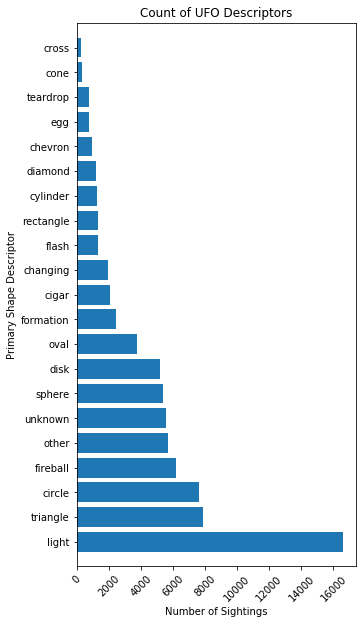

In [130]:
fig, ax = plt.subplots(figsize=(5,10))

shape_index = ufos["shape"].value_counts().index
shape_counts = ufos["shape"].value_counts().values

ax.barh(shape_index, shape_counts)
ax.set_ylim(-1, len(shape_index))
ax.set_title("Count of UFO Descriptors")
ax.set_ylabel("Primary Shape Descriptor")
ax.set_xlabel("Number of Sightings")
ax.tick_params(axis='x', rotation=45)